In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib #   !pip install dlib
from imutils import face_utils

In [2]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Test_openCV'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['Untitled-1.jpg',
 'Untitled-2.png',
 'imageAAA_60.jpg',
 'imageAAA_340.jpg',
 'models']

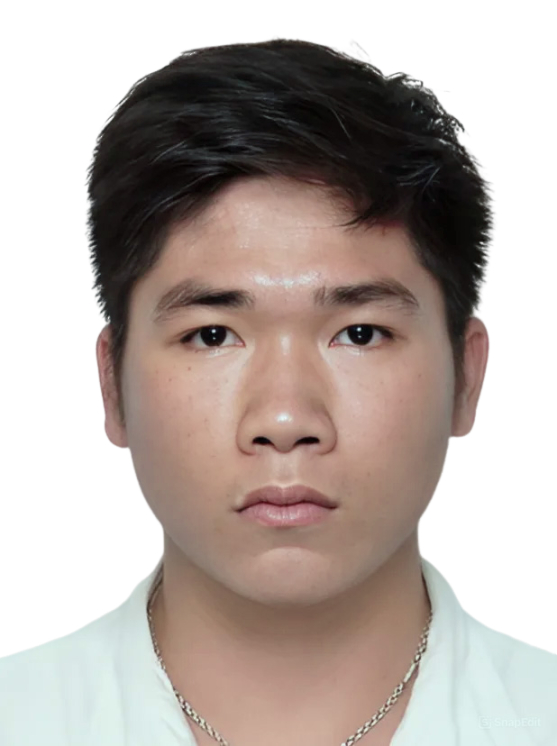

In [4]:
# Hiển thị một ảnh
img = cv2.imread(path + "/Untitled-2.png")
cv2_imshow(img)

In [5]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
print(face_landmarks_model_path)
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
print(face_recognition_model_path)
img_path = path+  "/Untitled-2.png"

/content/drive/MyDrive/Test_openCV/models/shape_predictor_68_face_landmarks.dat
/content/drive/MyDrive/Test_openCV/models/dlib_face_recognition_resnet_model_v1.dat


-0.058657
0.165738
-0.00336393
0.00888496
-0.086203
-0.0844898
-0.117992
-0.127697
0.0746961
-0.0146461
0.28661
-0.0325629
-0.20003
-0.182712
-0.0461972
0.174092
-0.194245
-0.130538
-0.0383159
0.00668259
0.0609551
0.039748
0.0134747
0.0430152
-0.0882522
-0.371989
-0.044964
-0.0733259
0.0107475
-0.0715047
-0.0681906
0.038049
-0.224271
-0.119113
0.06982
0.0686064
-0.0285909
0.00862721
0.190078
-0.00172874
-0.200282
0.0397009
0.0762368
0.276086
0.235074
0.0549883
0.00863547
-0.135971
0.0938933
-0.186195
0.0599937
0.175262
0.115654
0.0701944
-0.0569676
-0.123249
-0.0294276
0.107094
-0.161054
0.00479044
0.0941757
-0.115087
-0.0674272
-0.0854672
0.252803
0.0456468
-0.116176
-0.17256
0.0570767
-0.165701
-0.0974227
0.0443718
-0.0938835
-0.186387
-0.345023
0.0654859
0.328641
0.103923
-0.237416
0.0616759
-0.046562
-0.0186903
0.107838
0.0890682
-0.0138641
0.0283947
-0.118309
0.00186601
0.22045
-0.0717618
-0.0079334
0.239714
-0.0352751
0.114669
0.0718888
0.0361875
-0.0665594
0.0314782
-0.127356
-0

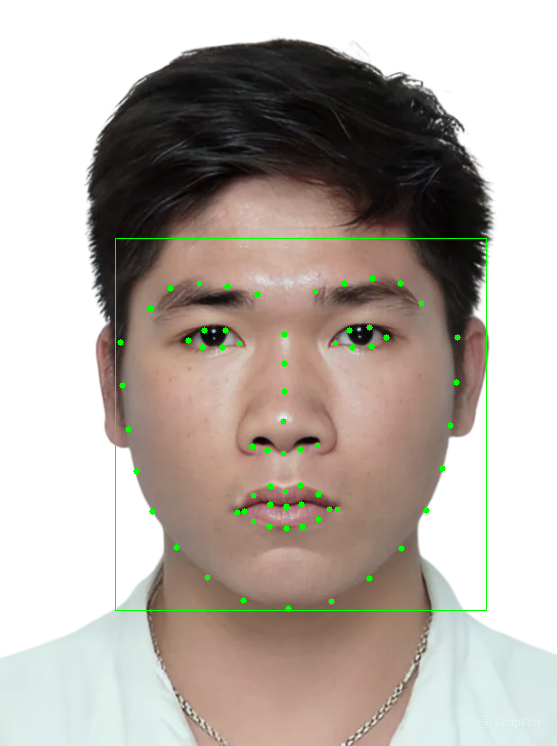

In [6]:
# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

     # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    print(face_descriptors)

     # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)